In [2]:
import pandas as pd
import numpy as np

# PLOTTING

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

sns.set(font_scale=1.8)
sns.set_style('white')

In [5]:
cells = pd.read_csv("./data/reconstructions/selected_cells.csv")
cell_numbers = pd.read_csv("./data/reconstructions/cell_numbers.csv")

In [6]:
greys = sns.color_palette("Greys")
greens = sns.color_palette("Greens")

In [7]:

def plot_dataset(ax, ds, cells, cell_numbers, increment=8,color1=greys[4], color2=greens[3], y_offset=0, text_y=500):

    x_max = 0
    x_ticks = []
    x_labels = []
    for r,c in cells[cells['ds_id'] == ds].iterrows():
        
        count = cell_numbers[(cell_numbers['ds_id'] == ds) & (cell_numbers['type'] ==c['type'])]['c_num'].values[0]
        neuron = pd.read_csv("./data/reconstructions/ds_%i_cell_%i.swc"%(ds,c['c_num']), delim_whitespace=True, comment='#',
                          names=['n', 'type', 'x', 'y', 'z', 'radius', 'parent'], index_col=False)
        
        node_positions = neuron[['x','y','z']].values
        radii = neuron["radius"].values
        neurite_type = neuron['type'].values
        soma_pos = node_positions[0]
        
        # plot axon and soma
        axon_idx = neurite_type < 3
        ax.scatter(node_positions[axon_idx,0] + x_max - soma_pos[0],
                   node_positions[axon_idx,2]+ y_offset - soma_pos[1], s=radii[axon_idx]*10, c=color1)
        
        # plot dendrites 
        dendrite_idx = neurite_type == 3
        ax.scatter(node_positions[dendrite_idx,0] + x_max - soma_pos[0], 
                   node_positions[dendrite_idx, 2]+ y_offset - soma_pos[1], s=radii[dendrite_idx]*10, c=color2)

        
        x_ticks += [x_max]
        
        if ds == 1:            
            ax.text(x_max -5, -45 + y_offset, c['type'].replace("CBC",""), weight='bold', fontsize=21)
            ax.text(x_max -5, -38 + y_offset, str(count), weight='bold', fontsize=21, color='grey')
            x_max += (np.max(node_positions[:,0]) - np.min(node_positions[:,0])) + increment
            x_labels += [c['type'].replace("CBC","")]
        else:
            
            ax.text(x_max, text_y + y_offset, c['type'], weight='bold', fontsize=21)
            ax.text(x_max, text_y -100 + y_offset, str(count), weight='bold', fontsize=21, color='grey')
            x_max += increment
            x_labels += [c['type']]

    
    ax.set_xticks([])
    sns.despine()
    plt.grid(False)
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

    _ = ax.set_yticks([])

    if ds == 1:
        ax.invert_yaxis()
        # plot x -scale bar
        scale_x = -20
        scale_y = -10
        ax.plot([scale_x,scale_x+10],[scale_y + y_offset,scale_y + y_offset], 'k',lw=3)
        # plot y -scale bar
        ax.plot([scale_x,scale_x],[scale_y,-20], 'k',lw=3)
    else:
        # plot x -scale bar
        scale_x = -300
        scale_y = -400
        ax.plot([scale_x,scale_x+100],[scale_y+ y_offset,scale_y+ y_offset], 'k',lw=3)
        # plot y -scale bar
        ax.plot([scale_x,scale_x],[scale_y+ y_offset,scale_y+ y_offset+100], 'k',lw=3)
   

## plot bipolar cells

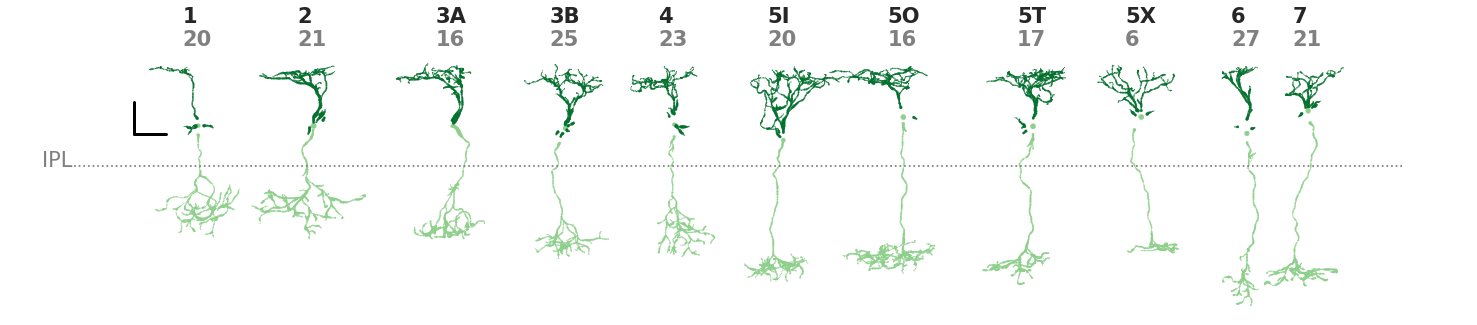

In [9]:
fig = plt.figure(figsize=(30,6))
grid = plt.GridSpec(1, 8, wspace=0.05, hspace=0.3)

ax = plt.subplot(grid[:-1])
plot_dataset(ax,ds=1,cells=cells, cell_numbers=cell_numbers, color1=[greens[2]], color2=[greens[-1]])

# plot IPL
xlim = ax.get_xlim()
ax.plot(xlim, [0,0], ':', c='grey')
ax.text(xlim[0] -10, 0, 'IPL', color='grey', fontsize=21)

plt.gca().set_aspect('equal')

## plot V1 data sets together ( ds 3, 5 and 4)

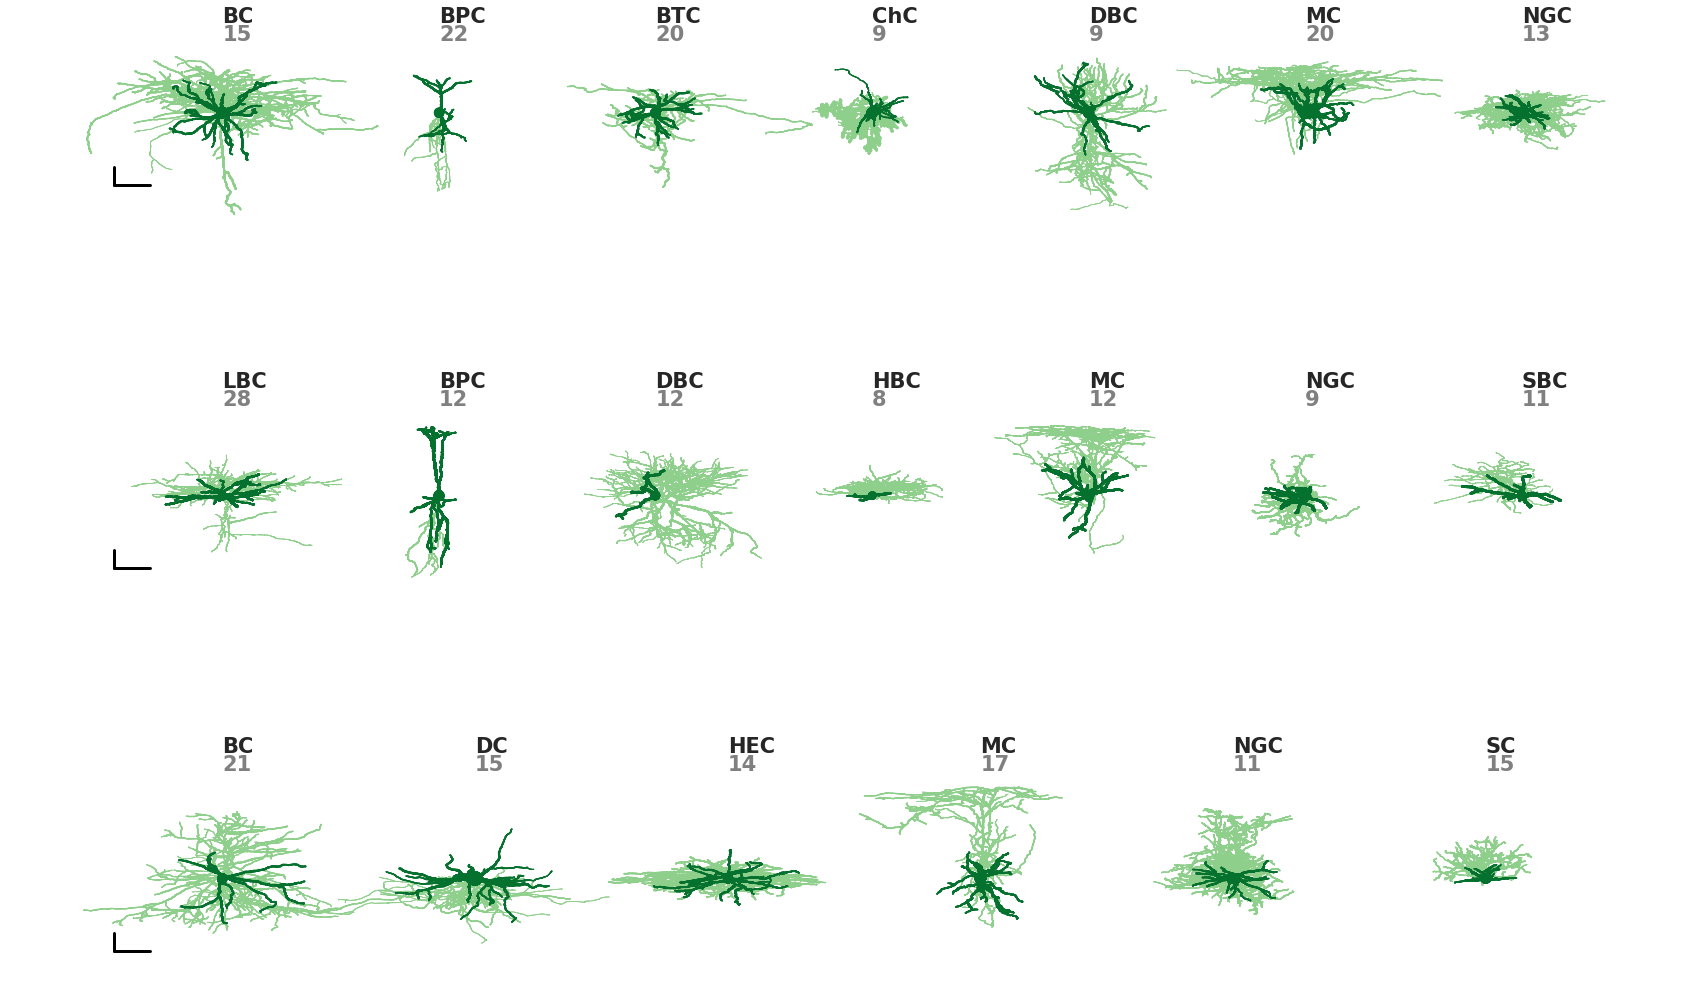

In [8]:
fig = plt.figure(figsize=(30,18))
grid = plt.GridSpec(3, 8, wspace=0.05, hspace=0.8)

ax = plt.subplot(grid[:8])
plot_dataset(ax, ds=3, cells=cells, cell_numbers=cell_numbers, increment = 600,
             color1=[greens[2]], color2=[greens[-1]])

ax2 = plt.subplot(grid[8:16], sharex=ax, sharey=ax)
plot_dataset(ax2, ds=5, cells=cells, cell_numbers=cell_numbers, increment=600, text_y=600,
             color1=[greens[2]], color2=[greens[-1]])

ax3 = plt.subplot(grid[16::], sharex=ax, sharey=ax)
plot_dataset(ax3, ds=4, cells=cells, cell_numbers=cell_numbers, increment = 700, text_y=700,
             color1=[greens[2]], color2=[greens[-1]])
